In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Emotion_dataset/fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
label_to_text={0:'Anger',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

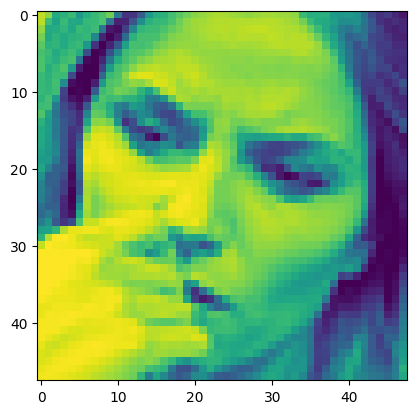

In [ ]:
pyplot.imshow(np.array(df.pixels.loc[2].split(' ')).reshape(48,48,1).astype('float'))


In [ ]:
img_array=df.pixels.apply(lambda x:np.array(x.split(' ')).reshape(48,48,1).astype('float32'))

In [ ]:
img_array=np.stack(img_array,axis=0)

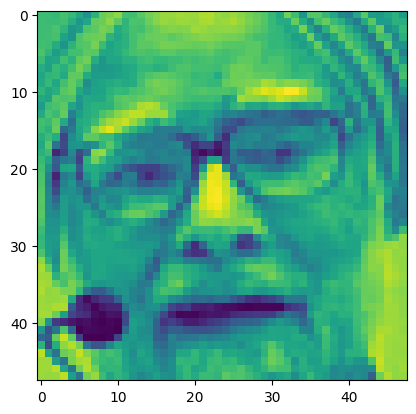

In [ ]:
pyplot.imshow(img_array[1])

In [ ]:
labels=df.emotion.values
len(labels)

35887

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(img_array,labels,test_size=0.2)

In [ ]:
y_train.shape

(28709,)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
import tensorflow as tf
import numpy as np
import os

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         257,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,007 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 651,847 (2.49 MB)

 Trainable params: 651,847 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(X_train,y_train,epochs=50,validation_split=.1)


Epoch 1/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2498 - loss: 1.8261 - val_accuracy: 0.2470 - val_loss: 1.8150
Epoch 2/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2577 - loss: 1.7920 - val_accuracy: 0.3142 - val_loss: 1.7405
Epoch 3/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3349 - loss: 1.6864 - val_accuracy: 0.3950 - val_loss: 1.5997
Epoch 4/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3853 - loss: 1.5815 - val_accuracy: 0.4117 - val_loss: 1.5141
Epoch 5/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4212 - loss: 1.5009 - val_accuracy: 0.4051 - val_loss: 1.5125
Epoch 6/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4454 - loss: 1.4457 - val_accuracy: 0.4566 - val_loss: 1.4105
Epoch 7/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4731 - loss: 1.3876 - val_accuracy: 0.4723 - val_loss: 1.3663
Epoch 8/50
808/808 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4978 - loss: 1.3314 - val_accuracy: 0

In [ ]:
model.fit(X_train,y_train,epochs=50,validation_split=.3)

Epoch 1/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9797 - loss: 0.0674 - val_accuracy: 0.8491 - val_loss: 1.0293
Epoch 2/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9823 - loss: 0.0626 - val_accuracy: 0.8470 - val_loss: 1.0692
Epoch 3/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9813 - loss: 0.0642 - val_accuracy: 0.8404 - val_loss: 1.0919
Epoch 4/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9831 - loss: 0.0583 - val_accuracy: 0.8398 - val_loss: 1.1102
Epoch 5/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9838 - loss: 0.0555 - val_accuracy: 0.8391 - val_loss: 1.1367
Epoch 6/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9834 - loss: 0.0577 - val_accuracy: 0.8227 - val_loss: 1.2363
Epoch 7/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9867 - loss: 0.0500 - val_accuracy: 0.8081 - val_loss: 1.2863
Epoch 8/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0536 - val_accuracy: 0.

In [ ]:
model.save("M73.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('M73.h5')

# Use the loaded model for predictions

In [ ]:
label_to_text={0:'Anger',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

In [ ]:
import cv2
from IPython.display import clear_output
import time

# Read the image using cv2
image = cv2.imread('/content/angry (1).png')  # Replace with the actual image path

# Preprocess the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image if necessary
resized_image = cv2.resize(gray_image, (48, 48))

# Normalize the pixel values if necessary
normalized_image = resized_image / 255.0

# Reshape the image to match the expected input shape
reshaped_image = normalized_image.reshape((1, 48, 48, 1))

# Make predictions
predicted = loaded_model.predict(reshaped_image).argmax()
prediction_text = label_to_text[predicted]
print(prediction_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
Anger


In [2]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from PIL import Image
import io
from tensorflow.keras.models import load_model

# Function to capture a photo using the webcam in Colab
def take_photo():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            video.remove();

            const dataUrl = canvas.toDataURL('image/jpeg');
            div.remove();
            return dataUrl;
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    image = np.array(Image.open(io.BytesIO(binary)))
    print("Image captured with shape:", image.shape)  # Debugging
    return image

# Load the pre-trained model and set up emotion labels
try:
    loaded_model = load_model("M73.h5", compile=False)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading model:", e)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
if face_cascade.empty():
    print("Error loading Haar Cascade. Please check the path.")

# Capture a frame using the webcam
frame = take_photo()

# Check if the frame is captured correctly
if frame is not None:
    # Convert the captured frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    print("Converted image to grayscale.")

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    print(f"Detected {len(faces)} face(s).")

    # Process each detected face
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]

        # Prepare the face ROI for emotion detection
        resized_face = cv2.resize(face_roi, (48, 48))
        normalized_face = resized_face / 255.0
        reshaped_face = normalized_face.reshape((1, 48, 48, 1))

        # Predict the emotion
        predicted = loaded_model.predict(reshaped_face).argmax()
        prediction_text = emotions[predicted]
        print(f"Predicted emotion: {prediction_text}")

        # Draw a rectangle around the face and add the predicted emotion text
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, prediction_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the final image with detected faces and predicted emotions
    from google.colab.patches import cv2_imshow
    cv2_imshow(frame)
else:
    print("No image captured.")

Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = 'M73.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error loading Haar Cascade. Please check the path.


<IPython.core.display.Javascript object>

KeyboardInterrupt: 